## Correspondance Analysis

Resources:

* Correspondance Analysis
  * [Very comprehensive & good overview of interpretations](https://www.mathematica-journal.com/2010/09/20/an-introduction-to-correspondence-analysis/)
  * [Less comprehensive & more to the point](https://www.displayr.com/how-correspondence-analysis-works/)
  * [Fully devoted to interpreting the output plot](https://www.displayr.com/interpret-correspondence-analysis-plots-probably-isnt-way-think/)

* Multiple Correspondance Analysis
  * [Compare and contrast CA vs MCA](https://www.displayr.com/correspondence-analysis-versus-multiple-correspondence-analysis-use/)

In [4]:
import pandas as pd
import numpy as np
# !pip install prince
import prince

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
authors = ['Charles Darwin', 'Rene Descartes','Thomas Hobbes', 'Mary Shelley', 'Mark Twain']

chars = ['B', 'C', 'D', 'F', 
         'G', 'H', 'I', 'L', 
         'M', 'N', 'P', 'R', 
         'S', 'U', 'W', 'Y']

long_names = ['Charles Darwin: 1', 'Charles Darwin: 2', 'Charles Darwin: 3',
              'Rene Descartes: 1', 'Rene Descartes: 2', 'Rene Descartes: 3',
              'Thomas Hobbes: 1', 'Thomas Hobbes: 2', 'Thomas Hobbes: 3', 
              'Mary Shelley: 1', 'Mary Shelley: 2', 'Mary Shelley: 3',
              'Mark Twain: 1', 'Mark Twain: 2', 'Mark Twain: 3']

short_names = ['CD1', 'CD2', 'CD3',
               'RD1', 'RD2', 'RD3',
               'TB1', 'TB2', 'TB3',
               'MS1', 'MS2', 'MS3',
               'MT1', 'MT2', 'MT3']

sample_crosstab = [[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                   [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                   [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                   [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                   [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                   [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                   [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                   [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                   [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                   [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                   [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                   [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                   [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                   [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                   [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]

crosstab = pd.DataFrame(np.transpose(sample_crosstab),
                        columns=long_names,
                        index=chars)

crosstab.columns.name = 'Author Sample'
crosstab.index.name = 'Character'
crosstab.style.background_gradient()

Author Sample,Charles Darwin: 1,Charles Darwin: 2,Charles Darwin: 3,Rene Descartes: 1,Rene Descartes: 2,Rene Descartes: 3,Thomas Hobbes: 1,Thomas Hobbes: 2,Thomas Hobbes: 3,Mary Shelley: 1,Mary Shelley: 2,Mary Shelley: 3,Mark Twain: 1,Mark Twain: 2,Mark Twain: 3
Character,,,,,,,,,,,,,,,
B,34,18,32,13,8,9,15,18,19,13,17,13,16,15,19
C,37,33,43,31,28,34,20,14,18,29,34,22,18,21,17
D,44,47,36,55,34,43,28,40,41,49,43,43,56,66,70
F,27,24,12,29,24,25,18,25,26,31,29,16,13,21,12
G,19,14,21,15,17,18,19,21,19,16,14,11,27,19,28
H,39,38,51,62,68,68,65,60,58,61,62,70,67,50,53
I,74,66,75,74,75,84,82,70,64,73,64,68,61,62,72
L,44,41,33,43,34,25,34,15,18,36,26,46,43,50,39
M,27,36,23,28,25,32,29,37,38,29,26,35,20,24,22


Do some analysis, which of these author samples appear to be most similar? Which letters appear to be most similar?

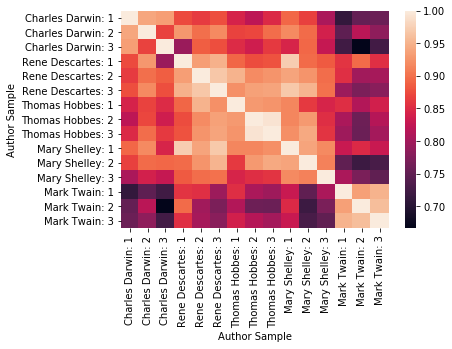

In [6]:
sns.heatmap(crosstab.corr())
plt.show()

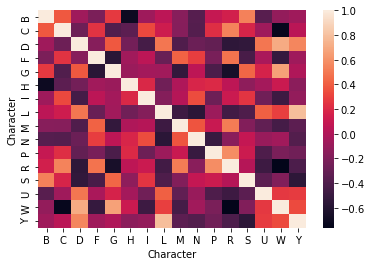

In [7]:
sns.heatmap(crosstab.T.corr())
plt.show()

Run the corrspondance analysis

In [8]:
ca = prince.CA(n_components=5, random_state=42)
ca.fit(crosstab)

CA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=5,
   n_iter=10, random_state=42)

Plot the variance explained by the components.

In [9]:
ca.explained_inertia_

[0.37265385200696244,
 0.1890124962070888,
 0.14238854761124403,
 0.1061254691692227,
 0.07276435332865698]

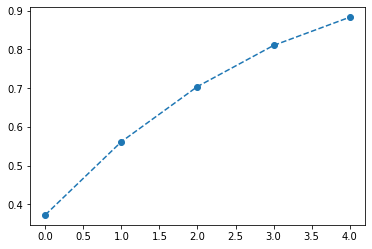

In [13]:
plt.plot(np.cumsum(ca.explained_inertia_),'--o')
plt.show()

This plot can be confusing to read.  A lot of misinterpretation can occur.  Double check your interpretation! Remember, we have a table showing us this information.  The main value of this plot is to try and uncover things we can easily overlook in the table, its not adding new information, but visualizing info we already have.  Double check your interpretation!

Interpretation guide:
* Start with interpreting just rows or just columns
* Rows plotted closer together are more similar in your contingency table
* Columns plotted closer together are more similar in your contingency table
* How close row points and column points are (in terms of euclidean distance) does not necesarily indicate that they are related/unrelated.
* You will use angles as a way to relate rows to columns

From the first resource linked above
> Possibly the simplest way to determine the relationship between a text sample and a character is to draw lines from their corresponding points in the plot to the origin. If the angle between the two lines is acute, then the character occurs more often in the sample than it does on average in the texts as a whole. Conversely, if the angle is obtuse, the character occurs less often than overall. The following draws the appropriate lines for our chosen text sample and characters; it appears the character “Y” occurs more often than average in “MT2”, while “P” occurs less often.

Which author samples are most similar?  Confirm this in the contingency table

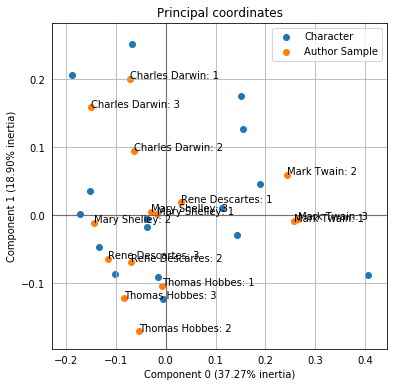

In [14]:
ca.plot_coordinates(crosstab, show_row_labels=False)
plt.show()

Which letters are most similar?  Confirm this in the contingency table

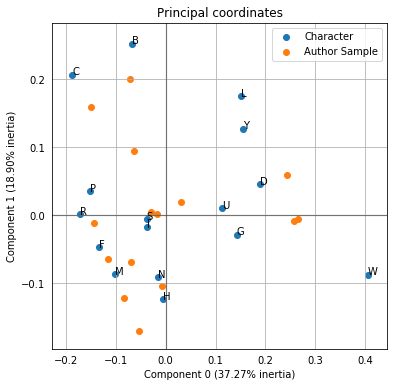

In [15]:
ca.plot_coordinates(crosstab, show_col_labels=False)
plt.show()

Which letter/author sample pairs are most associated? Confirm this in the contingency table

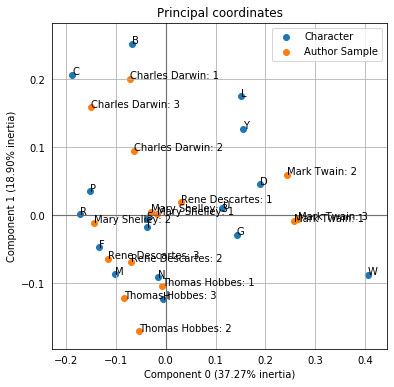

In [16]:
ca.plot_coordinates(crosstab)
plt.show()

## Multiple Correspondance Analysis

In [18]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data'
columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']

df = pd.read_csv(data_url, names=columns)
df.loc[df['Color'] == 'YELLOW', 'Age'] = 'ADULT'
df.loc[df['Color'] == 'PURPLE', 'Age'] = 'CHILD'
df.loc[0, 'Age'] = 'CHILD'
df.head()

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,CHILD,T
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,ADULT,F
3,YELLOW,SMALL,DIP,ADULT,F
4,YELLOW,SMALL,DIP,ADULT,F


Do some preliminary analysis, what do you expect to be related in our MCA?

In [20]:
pd.crosstab(df['Color'],df['Age'])

Age,ADULT,CHILD
Color,,
PURPLE,0,10
YELLOW,9,1


Perform MCA and plot.

In [21]:
mca = prince.MCA(2)
mca.fit(df)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

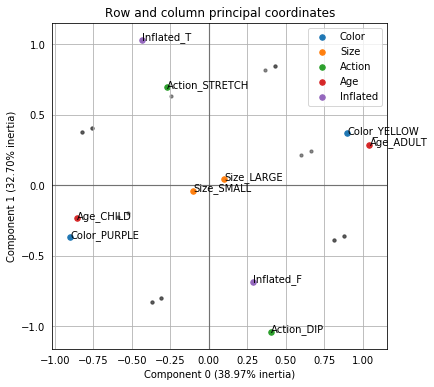

In [22]:
mca.plot_coordinates(df, show_column_labels=True)
plt.show()

## Factor Analysis of Mixed Data

In [23]:
df = pd.read_csv('https://github.com/nchelaru/data-prep/raw/master/telco_cleaned_renamed.csv')
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No SeniorCitizen,Partner,No Dependents,1,No PhoneService,No MultipleLines,DSL,No OnlineSecurity,OnlineBackup,No DeviceProtection,No TechSupport,No StreamingTV,No StreamingMovies,Month-to-month,PaperlessBilling,Electronic check,29.85,29.85,No Churn
1,Male,No SeniorCitizen,No Partner,No Dependents,34,PhoneService,No MultipleLines,DSL,OnlineSecurity,No OnlineBackup,DeviceProtection,No TechSupport,No StreamingTV,No StreamingMovies,One year,No PaperlessBilling,Mailed check,56.95,1889.50,No Churn
2,Male,No SeniorCitizen,No Partner,No Dependents,2,PhoneService,No MultipleLines,DSL,OnlineSecurity,OnlineBackup,No DeviceProtection,No TechSupport,No StreamingTV,No StreamingMovies,Month-to-month,PaperlessBilling,Mailed check,53.85,108.15,Churn
3,Male,No SeniorCitizen,No Partner,No Dependents,45,No PhoneService,No MultipleLines,DSL,OnlineSecurity,No OnlineBackup,DeviceProtection,TechSupport,No StreamingTV,No StreamingMovies,One year,No PaperlessBilling,Bank transfer (automatic),42.30,1840.75,No Churn
4,Female,No SeniorCitizen,No Partner,No Dependents,2,PhoneService,No MultipleLines,Fiber optic,No OnlineSecurity,No OnlineBackup,No DeviceProtection,No TechSupport,No StreamingTV,No StreamingMovies,Month-to-month,PaperlessBilling,Electronic check,70.70,151.65,Churn


In [0]:
# scale numeric data


In [0]:
# separate x and y


In [0]:
# perform famd on x
famd = prince.FAMD(n_components=25, random_state=42)
famd = famd.fit(X)

In [0]:
# plot row coordinates
famd.plot_row_coordinates(X, color_labels=y)